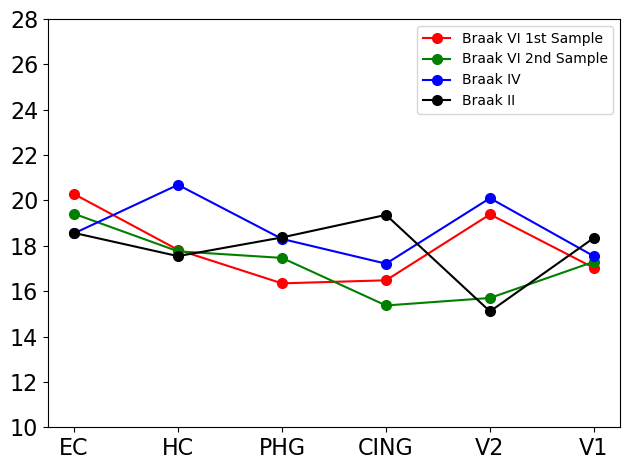

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

y1 = np.array([0.4,1.4,2.4,3.4,4.4,5.4])
R1 = np.array([20.28461762,17.82302504,16.34559263,16.47982132,19.38525591,17.02533617])
plt.plot([str(i) for i in y1], R1, linestyle='solid', marker='o', markersize= 7, color = 'red',label= f'Braak VI 1st Sample')


y2 = np.array([0.4,1.4,2.4,3.4,4.4,5.4])
R2 = np.array([19.41400082,17.75786325,17.46728183,15.36999092,15.7011297,17.29968747])
plt.plot([str(l) for l in y2], R2, linestyle='solid', marker='o', markersize= 7, color = 'green',label= f'Braak VI 2nd Sample')


y6 = np.array([0.4,1.4,2.4,3.4,4.4,5.4])
R6 = np.array([18.54882316,20.68908568,18.30442153,17.21298619,20.10091189,17.53904908]) # averaged roi's
plt.plot([str(j) for j in y6], R6, linestyle='solid', marker='o', markersize= 7, color = 'blue',label= f'Braak IV')


y4 = np.array([0.4,1.4,2.4,3.4,4.4])
R4 = np.array([16.48239459,17.5381404,17.41890976,17.72851855,18.61707995])
# plt.plot([str(m) for m in y4], R4, linestyle='solid', marker='o', markersize= 7, color = 'orange',label= f'Braak IV 2nd Sample')


y7 = np.array([0.4,1.4,2.4,3.4,4.4,5.4])
R7 = np.array([18.56985089,17.54523189,18.36926401,19.36364976,15.10860148,18.35384921])  
plt.plot([str(k) for k in y7], R7, linestyle='solid', marker='o', markersize= 7, color = 'black',label= f'Braak II')


y5 = np.array([0.4,1.4,2.4,3.4,4.4,5.4])
R5 = np.array([19.76578967,18.61802439,22.82502769,17.08761096,17.42217032, 18.29910761])
# plt.plot([str(n) for n in y5], R5, linestyle='solid', marker='o', markersize= 7, color = 'brown',label= f'Braak II 2nd Sample')



y = np.array([0,1,2,3,4,5])
l = ['EC','HC','PHG','CING','V2','V1']
plt.xticks(y,l)
plt.yticks(np.arange(10,30,step=2))
plt.xticks(fontsize=16)  # Increase x-axis tick label font size
plt.yticks(fontsize=16)
plt.tight_layout()
plt.legend()
plt.show()

In [17]:
"""
BRAIN VISUALIZATION - LITERATURE-VERIFIED COORDINATES
======================================================
4 columns: Braak VI (1st sample), Braak VI (2nd sample), Braak IV, Braak II
6 rows: EC slice, HC slice, PHG slice, CING slice, V2 slice, V1 slice

All coordinates verified with exact X,Y,Z values from peer-reviewed papers.
"""

import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import warnings
warnings.filterwarnings('ignore')

from nilearn import plotting, datasets

# =============================================================================
# RAW DATA ARRAYS (from original measurements)
# =============================================================================
# R1 = np.array([20.28461762, 17.82302504, 16.34559263, 16.47982132, 19.38525591, 17.02533617])
# R2 = np.array([19.41400082, 17.75786325, 17.46728183, 15.36999092, 15.7011297, 17.29968747])
# R6 = np.array([18.54882316, 20.68908568, 18.30442153, 17.21298619, 20.10091189, 17.53904908])
# R7 = np.array([18.56985089, 17.54523189, 18.36926401, 19.36364976, 15.10860148, 18.35384921])

# =============================================================================
# RAW DATA DICTIONARY
# =============================================================================
RAW_DATA = {
    'Braak VI 1st': {
        'EC': R1[0], 'HC': R1[1], 'PHG': R1[2],
        'CING': R1[3], 'V2': R1[4], 'V1': R1[5]
    },
    'Braak VI 2nd': {
        'EC': R2[0], 'HC': R2[1], 'PHG': R2[2],
        'CING': R2[3], 'V2': R2[4], 'V1': R2[5]
    },
    'Braak IV': {
        'EC': R6[0], 'HC': R6[1], 'PHG': R6[2],
        'CING': R6[3], 'V2': R6[4], 'V1': R6[5]
    },
    'Braak II': {
        'EC': R7[0], 'HC': R7[1], 'PHG': R7[2],
        'CING': R7[3], 'V2': R7[4], 'V1': R7[5]
    },
}

# Final data structure for visualization: 4 columns (NO AVERAGING)
DATA = {
    'Braak VI\n(1st sample)': RAW_DATA['Braak VI 1st'],
    'Braak VI\n(2nd sample)': RAW_DATA['Braak VI 2nd'],
    'Braak IV': RAW_DATA['Braak IV'],
    'Braak II': RAW_DATA['Braak II'],
}

# =============================================================================
# LITERATURE-VERIFIED MNI COORDINATES
# =============================================================================
ROI_COORDS = {
    'EC':   (-19, -12, -30),
    'HC':   (-22, -20, -18),
    'PHG':  (-25, -22, -22),
    'CING': (-5, 14, 42),
    'V1':   (-8, -76, 10),
    'V2':   (-8, -80, 22),
}

# Slice configuration: 6 rows at anatomically correct z-levels
SLICE_CONFIG = [
    (-30, ['EC'], "EC"),
    (-18, ['HC'], "HC"),
    (-22, ['PHG'], "PHG"),
    (+42, ['CING'], "CING"),
    (+22, ['V2'], "V2"),
    (+10, ['V1'], "V1"),
]

APPARENT_RADIUS = 10  # mm

# =============================================================================
# PRINT DATA SUMMARY
# =============================================================================
print("="*70)
print("DATA SUMMARY")
print("="*70)
for stage, values in DATA.items():
    print(f"\n{stage.replace(chr(10), ' ')}:")
    for region, val in values.items():
        if val is not None:
            print(f"  {region}: {val:.2f} Å")
        else:
            print(f"  {region}: MISSING")

# =============================================================================
# HELPER FUNCTIONS
# =============================================================================
def calc_radius(region, slice_z):
    """Calculate sphere radius so it appears as APPARENT_RADIUS on slice"""
    z_coord = ROI_COORDS[region][2]
    distance = abs(z_coord - slice_z)
    radius = int(np.ceil(np.sqrt(APPARENT_RADIUS**2 + distance**2)))
    return max(radius, APPARENT_RADIUS)

# =============================================================================
# LOAD TEMPLATE
# =============================================================================
print("\nLoading MNI template (1mm resolution)...")
mni_template = datasets.load_mni152_template(resolution=1)
mni_affine = mni_template.affine
mni_shape = mni_template.shape
print(f"Template shape: {mni_shape}")

all_values = [v for stage in DATA.values() for v in stage.values() if v is not None]
VMIN = min(all_values)
VMAX = max(all_values)
print(f"Color scale range: {VMIN:.2f} - {VMAX:.2f} Å")

# =============================================================================
# ROI IMAGE CREATION
# =============================================================================
def create_roi_image_for_regions(values, regions_to_show, slice_z):
    """Create spheres with region-specific radii calculated for this slice"""
    stat_data = np.zeros(mni_shape, dtype=np.float32)
    mni_to_voxel = np.linalg.inv(mni_affine)
    
    for region in regions_to_show:
        coord = ROI_COORDS[region]
        val = values[region]
        
        if val is None:
            continue
            
        radius = calc_radius(region, slice_z)
        
        # Bilateral placement
        for x_sign in [-1, 1]:
            mni_coord = np.array([x_sign * abs(coord[0]), coord[1], coord[2], 1])
            voxel_coord = mni_to_voxel @ mni_coord
            cx, cy, cz = int(voxel_coord[0]), int(voxel_coord[1]), int(voxel_coord[2])
            
            for x in range(max(0, cx-radius), min(mni_shape[0], cx+radius+1)):
                for y in range(max(0, cy-radius), min(mni_shape[1], cy+radius+1)):
                    for z in range(max(0, cz-radius), min(mni_shape[2], cz+radius+1)):
                        if np.sqrt((x-cx)**2 + (y-cy)**2 + (z-cz)**2) <= radius:
                            stat_data[x, y, z] = val
    
    return nib.Nifti1Image(stat_data, mni_affine)

# =============================================================================
# CREATE FIGURE - TRANSPOSED: Stages as rows, Regions as columns
# =============================================================================
print("Creating figure with transposed layout (stages as rows, regions as columns)...")

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('white')

# 6 rows: 4 for stages + 1 for colorbar + 1 for line plot, 6 columns for regions
gs = GridSpec(6, 6, figure=fig, 
              height_ratios=[1.2, 1.2, 1.2, 1.2, 0.12, 1.5],  # Taller line plot for legend space
              hspace=0.12, wspace=0.05,
              left=0.18, right=0.95, top=0.82, bottom=0.10)  # Much lower bottom for bigger slices

axes = np.empty((4, 6), dtype=object)
for row in range(4):
    for col in range(6):
        axes[row, col] = fig.add_subplot(gs[row, col])

# Custom colormap from blue to dark blue (no white) - deep blue highest
from matplotlib.colors import LinearSegmentedColormap
colors_list = ['#5DADE2', '#2874A6', '#0A2463']  # Darker start blue -> Medium blue -> Deep blue
cmap = LinearSegmentedColormap.from_list('LightToDarkBlue', colors_list)
norm = plt.Normalize(vmin=VMIN, vmax=VMAX)

# Stage order (rows)
stage_list = list(DATA.keys())
# Region order (columns) - matches bottom plot x-axis
region_order = ['EC', 'HC', 'PHG', 'CING', 'V2', 'V1']

for row, (stage, values) in enumerate(DATA.items()):
    for col, region in enumerate(region_order):
        ax = axes[row, col]
        
        # Get z-level for this region
        z_level = ROI_COORDS[region][2]
        
        roi_img = create_roi_image_for_regions(values, [region], z_level)
        
        display = plotting.plot_stat_map(
            roi_img,
            bg_img=mni_template,
            display_mode='z',
            cut_coords=[z_level],
            axes=ax,
            cmap=cmap,
            threshold=VMIN - 0.01,
            vmin=VMIN,
            vmax=VMAX,
            colorbar=False,
            annotate=False,
            black_bg=False,
        )
        
        nilearn_ax = list(display.axes.values())[0].ax
        
        # L and R closer to slice, moved up
        nilearn_ax.text(0.05, 0.96, 'L', transform=nilearn_ax.transAxes,
                       fontsize=18, fontweight='bold', color='black',
                       ha='left', va='top')
        nilearn_ax.text(0.95, 0.96, 'R', transform=nilearn_ax.transAxes,
                       fontsize=18, fontweight='bold', color='black',
                       ha='right', va='top')

# =============================================================================
# COLORBAR - Horizontal at TOP above slices (higher position)
# =============================================================================
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Horizontal colorbar at top - centered over 4 columns, shifted right, higher
cbar_ax = fig.add_axes([0.365, 0.92, 0.40, 0.012])  # [left, bottom, width, height] - moved left
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Void Radius (Å)', fontsize=22, fontweight='bold', labelpad=12)
tick_values = np.linspace(VMIN, VMAX, 6)
cbar.set_ticks(tick_values)
cbar.set_ticklabels([f'{v:.1f}' for v in tick_values])
cbar.ax.tick_params(labelsize=18)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# =============================================================================
# ADD LINE PLOT - centered with brain slices
# =============================================================================
# Get the x-positions of the brain slice columns to align the line plot
fig.canvas.draw()
col_centers = []
for col in range(6):
    bbox = axes[0, col].get_position()
    col_centers.append((bbox.x0 + bbox.x1) / 2)

# Get left and right edges of brain slices grid
left_edge = axes[0, 0].get_position().x0
right_edge = axes[0, 5].get_position().x1

# Create line plot with custom position - taller plot
line_ax_pos = fig.add_axes([left_edge, 0.03, right_edge - left_edge, 0.22])  # Taller plot for legend space
line_ax = line_ax_pos

x_positions = list(range(len(region_order)))

# Line plot data - 4 lines matching the 4 rows
line_data = {
    'Braak VI 1st Sample': RAW_DATA['Braak VI 1st'],
    'Braak VI 2nd Sample': RAW_DATA['Braak VI 2nd'],
    'Braak IV': RAW_DATA['Braak IV'],
    'Braak II': RAW_DATA['Braak II'],
}

# Different markers for each Braak stage
markers = {'Braak VI 1st Sample': 'o', 'Braak VI 2nd Sample': 's', 
           'Braak IV': '^', 'Braak II': 'D'}

# Line colors - Braak IV changed to Orange
line_colors = {'Braak VI 1st Sample': '#E63946', 'Braak VI 2nd Sample': '#2A9D8F', 
               'Braak IV': '#FF8C00', 'Braak II': '#8B008B'}  # Dark Orange for Braak IV

for stage_name, stage_data in line_data.items():
    y_values = [stage_data[region] if stage_data[region] is not None else np.nan for region in region_order]
    
    line_ax.plot(x_positions, y_values, color=line_colors[stage_name], 
                 linewidth=3.0, alpha=0.9, zorder=3, marker=markers[stage_name],
                 markersize=8, markerfacecolor=line_colors[stage_name],
                 markeredgecolor='white', markeredgewidth=1.5, label=stage_name)

line_ax.set_xticks(x_positions)
line_ax.set_xticklabels(region_order, fontsize=22, fontweight='bold', color='black')
line_ax.set_xlabel('Brain Region', fontsize=24, fontweight='bold')
line_ax.set_ylabel('Void Radius (Å)', fontsize=24, fontweight='bold')
line_ax.set_ylim(12, 22)  # More spread out y-axis
line_ax.set_yticks([12, 14, 16, 18, 20, 22])
line_ax.legend(loc='lower left', fontsize=18, framealpha=0.95, edgecolor='gray')
line_ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
line_ax.tick_params(axis='both', labelsize=20)
line_ax.set_facecolor('#FAFAFA')
line_ax.spines['top'].set_visible(False)
line_ax.spines['right'].set_visible(False)

# Adjust line plot x-axis limits to center ticks under brain slices
line_ax.set_xlim(-0.5, 5.5)

# =============================================================================
# ADD VERTICAL LINES FROM PLOT TO SLICES
# =============================================================================
# Get the top of the line plot
line_ax_bbox = line_ax.get_position()
line_plot_top = line_ax_bbox.y1

# Get the bottom of the last row of slices (Braak II)
last_row_bbox = axes[3, 0].get_position()
slices_bottom = last_row_bbox.y0

# Calculate line length (1/4 of original)
total_gap = slices_bottom - line_plot_top
line_length = total_gap * 0.7
line_start = line_plot_top + 0.01
line_end = line_start + line_length

# Draw vertical lines for each region column
for col in range(6):
    bbox = axes[0, col].get_position()
    x_center = (bbox.x0 + bbox.x1) / 2
    # Draw short, wide line from top of plot
    fig.add_artist(plt.Line2D([x_center, x_center], [line_start, line_end], 
                              transform=fig.transFigure, color='black', linewidth=4, zorder=1))

# =============================================================================
# ADD ROW LABELS (Stages) - adjusted position for spacing
# =============================================================================
row_colors = ['#E63946', '#2A9D8F', '#FF8C00', '#8B008B']  # Dark Orange for Braak IV
row_labels = ['Braak VI\n(1st sample)', 'Braak VI\n(2nd sample)', 'Braak IV', 'Braak II']
for row, (label, color) in enumerate(zip(row_labels, row_colors)):
    bbox = axes[row, 0].get_position()
    y_center = (bbox.y0 + bbox.y1) / 2
    fig.text(0.17, y_center, label,  # Adjusted x position
             fontsize=20, fontweight='bold', ha='right', va='center', color=color)

# =============================================================================
# ADD COLUMN TITLES (Regions with z-values) - BLACK color, further from slices
# =============================================================================
for col, region in enumerate(region_order):
    z_level = ROI_COORDS[region][2]
    bbox = axes[0, col].get_position()
    x_center = (bbox.x0 + bbox.x1) / 2
    fig.text(x_center, 0.86, f'{region}\nz = {z_level}', 
             fontsize=20, fontweight='bold', ha='center', va='bottom', color='black')

# =============================================================================
# TITLE AND LEGEND
# =============================================================================
# Main title - above colorbar
fig.suptitle('Average Void Radius (Å) Across Brain Regions by Braak Stage', 
             fontsize=26, fontweight='bold', y=1.03)

plt.savefig('brain_6slices.png', dpi=600, facecolor='white', bbox_inches='tight', pad_inches=0.1)
plt.close()

print("\n✓ Saved: brain_6slices.png")
print("\n" + "="*70)
print("LITERATURE-VERIFIED MNI COORDINATES")
print("="*70)
for region, coord in ROI_COORDS.items():
    print(f"  {region}: {coord}")

DATA SUMMARY

Braak VI (1st sample):
  EC: 20.28 Å
  HC: 17.82 Å
  PHG: 16.35 Å
  CING: 16.48 Å
  V2: 19.39 Å
  V1: 17.03 Å

Braak VI (2nd sample):
  EC: 19.41 Å
  HC: 17.76 Å
  PHG: 17.47 Å
  CING: 15.37 Å
  V2: 15.70 Å
  V1: 17.30 Å

Braak IV:
  EC: 18.55 Å
  HC: 20.69 Å
  PHG: 18.30 Å
  CING: 17.21 Å
  V2: 20.10 Å
  V1: 17.54 Å

Braak II:
  EC: 18.57 Å
  HC: 17.55 Å
  PHG: 18.37 Å
  CING: 19.36 Å
  V2: 15.11 Å
  V1: 18.35 Å

Loading MNI template (1mm resolution)...
Template shape: (197, 233, 189)
Color scale range: 15.11 - 20.69 Å
Creating figure with transposed layout (stages as rows, regions as columns)...

✓ Saved: brain_6slices.png

LITERATURE-VERIFIED MNI COORDINATES
  EC: (-19, -12, -30)
  HC: (-22, -20, -18)
  PHG: (-25, -22, -22)
  CING: (-5, 14, 42)
  V1: (-8, -76, 10)
  V2: (-8, -80, 22)
